<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/58_Day_A_logistic_reg_by_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [431]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification

In [432]:
X,y= make_classification(n_samples=100, n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1, random_state=42,
                         hypercube=False , class_sep=5)

In [433]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

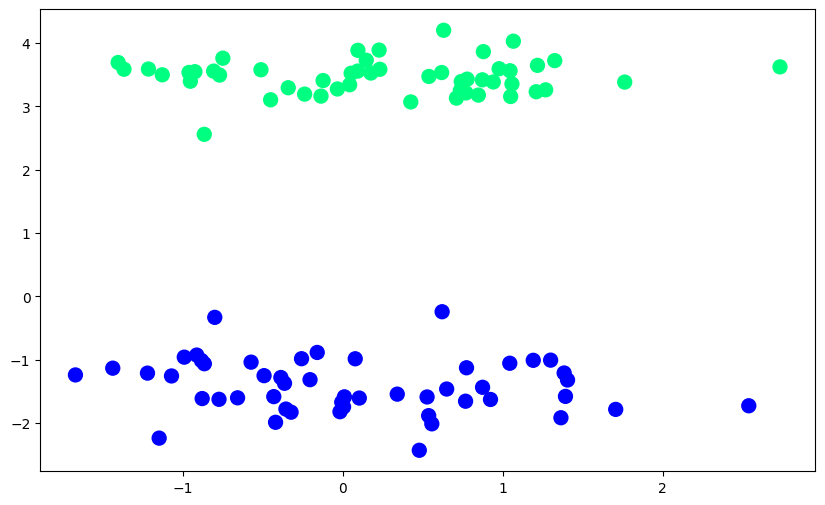

In [434]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [435]:
def Perceptron(X,y,epochs,eta):
  X=np.insert(X,0,1,axis=1)
  w=np.ones(X.shape[1])
  w[0]=0
  w.reshape(1,-1)

  for i in range(epochs):
    index= np.random.randint(0,X.shape[0])
    x=X[index]
    y_=y[index]
    y_pred=step(np.dot(w,x)) # step fun 0.002 it is greater then 0 give -> 1 -.332 give -> 0
    w=w + eta*(y_- y_pred)*x

  return w[0],w[1:]


In [436]:
def step(z):
  if z>= 0 :
    return 1
  else:
    return 0

In [437]:
intercept_,coef_=Perceptron(X,y,1000,0.01)


In [438]:
coef_

array([0.77765623, 1.14687601])

In [439]:
C=intercept_
B=coef_[1]
A=coef_[0]

m=-A/B
b=-C/B # y=mx+c

In [440]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

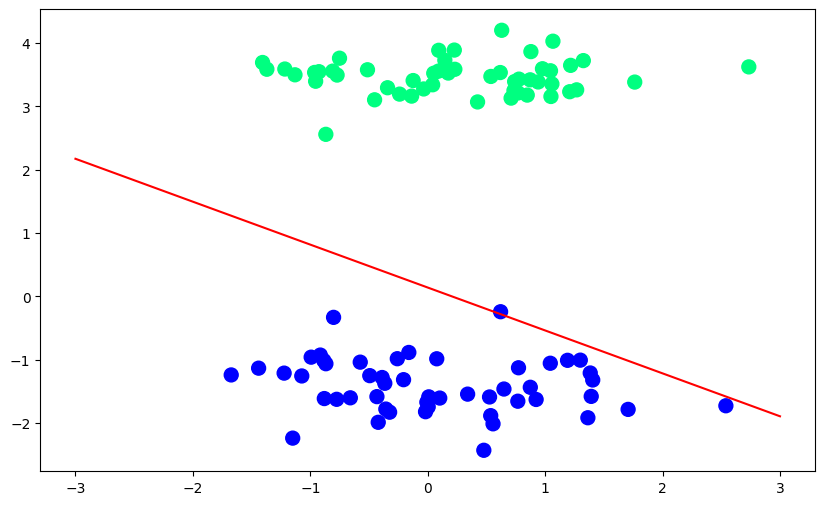

In [441]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,c='r')
plt.show()

In [442]:
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [443]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_[0]/lor.coef_[0][1])

In [444]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input+b

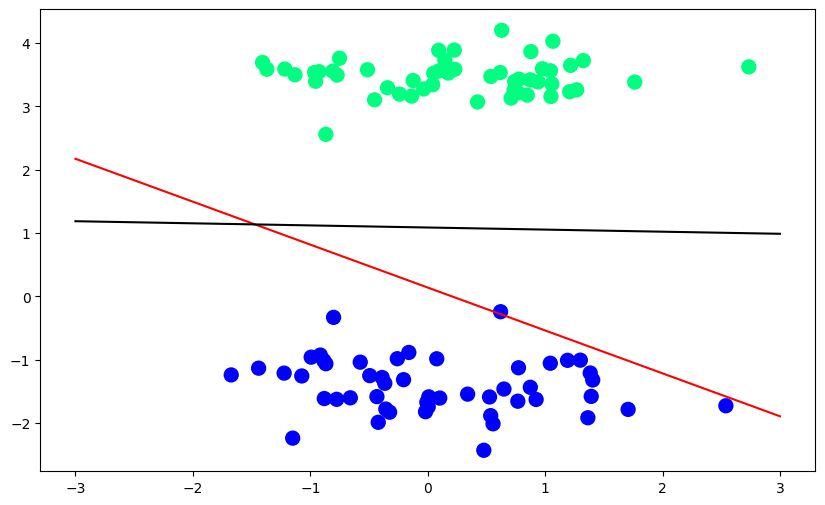

In [445]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,c='r')
plt.plot(x_input1,y_input1, c='black')
plt.show()